# Simple Phantom Construction Demo

Demonstrates simple basic custom phantom and sinogram generation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from xdesign import *

`polytope` failed to import `cvxopt.glpk`.
Will use `scipy.optimize.linprog`.


Create various `Features` with geometries and assign attenuation `values` to each of the `Features`.

In [2]:
head = Feature(Circle(Point(0.5, 0.5), radius=0.5))
head.mass_atten = 1
eyeL = Feature(Circle(Point(0.3, 0.5), radius=0.1))
eyeL.mass_atten = 1
eyeR = Feature(Circle(Point(0.7, 0.5), radius=0.1))
eyeR.mass_atten = 1
mouth = Feature(Triangle(Point(0.2, 0.7), Point(0.5, 0.8), Point(0.8, 0.7)))
mouth.mass_atten = -1

Add 'Features' to 'Phantom'.

In [3]:
Shepp = Phantom()
Shepp.append(head)
Shepp.append(eyeL)
Shepp.append(eyeR)
Shepp.append(mouth)

Plot the `Phantom` geometry and properties with a colorbar.

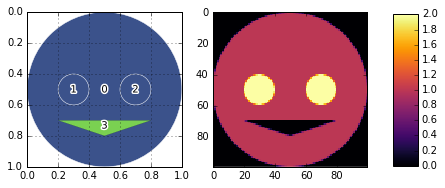

In [17]:
fig = plt.figure(figsize=(7, 3), dpi=600)

# plot geometry
axis = fig.add_subplot(121, aspect='equal')
plt.grid('on')
plt.gca().invert_yaxis()
plot_phantom(Shepp, axis=axis, labels=False)

# plot property
plt.subplot(1, 2, 2)
im = plt.imshow(discrete_phantom(Shepp, 100, prop='mass_atten'), interpolation='none', cmap=plt.cm.inferno)

# plot colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.16, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

# save the figure
plt.savefig('Shepp_sidebyside.png', dpi=600,
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.0,
        frameon=False)
plt.show()

Simulate data acquisition for parallel beam around 180 degrees.

In [18]:
sx, sy = 100, 100
step = 1. / sy
prb = Probe(Point(step / 2., -10), Point(step / 2., 10), step)
theta = np.pi / sx
sino = np.zeros(sx * sy)

a = 0
for m in range(sx):
    for n in range(sy):
        update_progress((m*sy + n)/(sx*sy))
        sino[a] = prb.measure(Shepp)
        a += 1
        prb.translate(step)
    prb.translate(-1)
    prb.rotate(theta, Point(0.5, 0.5))
update_progress(1)

[##########] 100.00%


Plot the sinogram.

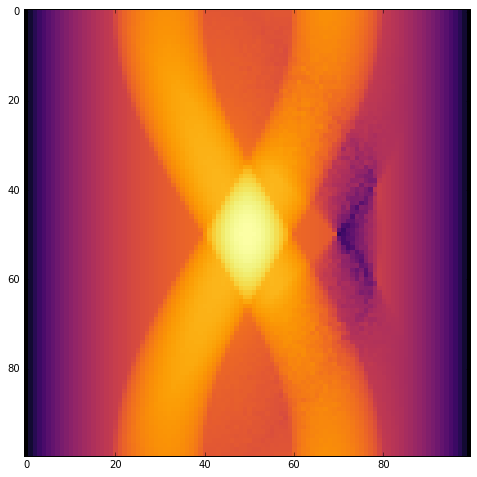

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(np.reshape(sino, (sx, sy)), cmap='inferno', interpolation='nearest')
plt.savefig('Shepp_sinogram.png', dpi=600,
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.0,
        frameon=False)
plt.show()